In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import FileLink

In [43]:
obstacle_clr = [255,0,0]
road_clr = [128,64,128]
opacity = 0.5

In [44]:
#Load image and gt

#TODO hardcoded paths

original_image_path = 'data/export/datasets/RoadAnomaly/test/imgs/animals27_wildlife_bear.png'
original_image = cv.imread(original_image_path) 
assert original_image is not None, "original_image could not be read, check with os.path.exists()"

original_gt_path = 'data/export/datasets/RoadAnomaly/test/gt/animals27_wildlife_bear.png'
original_gt = cv.imread(original_gt_path) 
assert original_image is not None, "original_image could not be read, check with os.path.exists()"



#Unnecessary scaling - image = cv.resize(image, (W, W))  # Resize to W x W

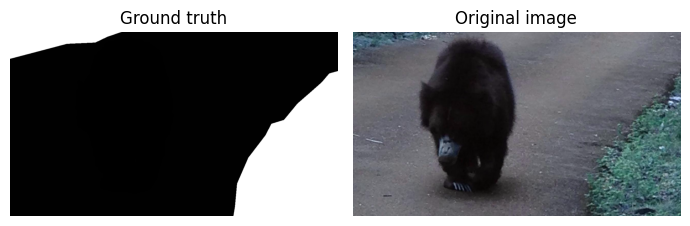

In [45]:
#Image preview

fig, ax = plt.subplots(1, 2, figsize=(7, 3))  # 1 row, 2 columns, and adjust the figure size as needed
# Display the mask
ax[0].imshow(original_gt)
ax[0].set_title('Ground truth')
ax[0].axis('off')  # Hide axes

# Display the image
ax[1].imshow(original_image)
ax[1].set_title('Original image')
ax[1].axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [57]:
# Overlay of gt with image
def DrawOverlay(opacity):
    assert original_image.shape[:2] == original_gt.shape[:2], "Images must have the same dimensions"

    # Create masks of gt
    road_mask = (original_gt == 1)
    obstacle_mask = (original_gt == 0)

    # Create a road and anomaly overlays with the same size as the image
    road_overlay = np.zeros_like(original_image)
    road_overlay[:, :] = road_clr

    obstacle_overlay = np.zeros_like(original_image)
    obstacle_overlay[:, :] = obstacle_clr


    #Create colored masks
    road_clr_mask = road_overlay * road_mask
    obstacle_clr_mask = obstacle_overlay * obstacle_mask


    # With opacity
    combined_mask = cv.add(road_clr_mask, obstacle_clr_mask)
    combined_image = cv.addWeighted(combined_mask, opacity, original_image , 1, 0)

    # Full color values
    #inverted_mask = np.where(combined_mask == 0, 1, 0).astype(np.uint8)
    #combined_image = cv.add(combined_mask, inverted_mask * original_image)

    return combined_image
    fig, ax = plt.subplots(1, 4, figsize=(10, 6))
    ax[0].imshow(original_image)
    ax[0].set_title('Original_image')
    ax[0].axis('off') 

    ax[1].imshow(road_clr_mask)
    ax[1].set_title('Colored mask')
    ax[1].axis('off')  

    ax[2].imshow(combined_mask)
    ax[2].set_title('Combined mask')
    ax[2].axis('off')  

    ax[3].imshow(combined_image)
    ax[3].set_title('Combined image')
    ax[3].axis('off')  

    plt.tight_layout()
    plt.show()



In [53]:
def drawContoure():
    # Convert image to grayscale
    imgray = cv.cvtColor(original_gt, cv.COLOR_BGR2GRAY)

    # Apply thresholding
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    #thresh = (original_gt == 1)

    # Check OpenCV version and handle findContours output accordingly
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # Draw the contours on the original image (or a copy of it)
    contours_image = original_image.copy()
    cv.drawContours(contours_image, contours, -1, (0, 255, 0), 3)  
    final_contours_image = cv.cvtColor(contours_image, cv.COLOR_BGR2RGB)
    
    
    
    #TODO
    # Apply thresholding
    ret, thresh = cv.threshold(imgray, 0, 255, 0)
    #thresh = (original_gt == 1)

    # Check OpenCV version and handle findContours output accordingly
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # Draw the contours on the original image (or a copy of it)
    cv.drawContours(contours_image, contours, -1, (0, 0, 128), 3)  
    final_contours_image = cv.cvtColor(contours_image, cv.COLOR_BGR2RGB)
    
    
    
    
    
    return final_contours_image

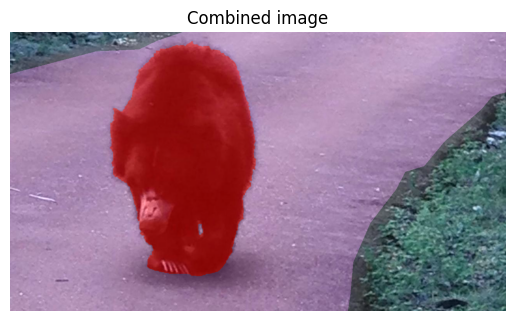

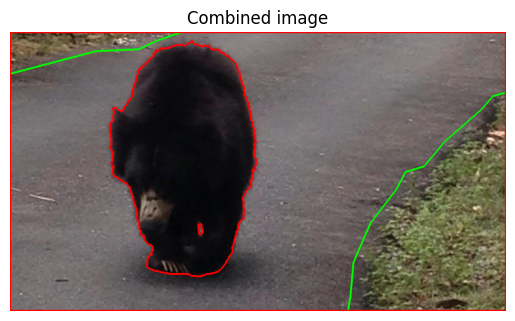

In [58]:

plt.imshow(DrawOverlay(0.5))
plt.title("Combined image")
plt.axis('off')
plt.show()

plt.imshow(drawContoure())
plt.title("Combined image")
plt.axis('off')
plt.show()
